In [2]:
# Import all the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot
plt.close('all')
plt.rcParams['figure.figsize'] = (12.0, 5.0)

# Script to import data and data preparation 

In [3]:
# Script to import the data to data frame from multiple csv files  
dir = "C:\\test\\"
df = []
files = os.listdir(path=dir)
#files
for filename in files:
    #print(dir + filename)
    data = pd.read_csv(dir +filename)
    df.append(data)
df = pd.concat(df)

In [4]:
# Data loading, data prep, data consolidation
df1 = df.filter(items=['location_id', 'location_name','cause_id','cause_name', 'sex_id', 'sex','year_id', 'mx',])
df2=df1[df1['sex'].isin(['Both'])]
df3=df2[df2['location_id'].isin(['523','524','525','526','527','528','529','530','531','532','533','534','535','536','537','538','539','540','541','542','543','544','545','546','547','548','549','550','551','552','553','554','555','556','557','558','559','560','561','562','563','564','565','566','567','568','569','570','571','572','573'])]
df3[:2]

,location_id,location_name,cause_id,cause_name,sex_id,sex,year_id,mx
70,523,Alabama,508,Chronic respiratory diseases,3,Both,1980,42.433142
71,523,Alabama,508,Chronic respiratory diseases,3,Both,1981,42.639875


# Chronic Respiratory Disease Analysis


In [5]:
# Data cleasning and prepartion
df_respiratory=df3[df3['cause_id'].isin(['508'])]
df1_respiratory=df_respiratory[['location_name','year_id','mx']]
df2_respiratory=df1_respiratory.set_index('location_name')
df3_respiratory=df2_respiratory.sort_values(by=['year_id'])
df4_respiratory=df3_respiratory.pivot(columns='year_id',values='mx')
df4_respiratory[:2]

year_id,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
location_name,,,,,,,,,,,,,,,,,,,,,
Alabama,42.433142,42.639875,42.723237,43.383702,44.695948,46.290102,47.223113,47.519996,49.150882,49.728880,...,69.206264,69.541165,70.055010,70.572326,70.703882,70.858195,71.797968,72.033699,72.665796,73.442271
Alaska,55.162292,53.918701,53.121218,53.715519,53.902330,54.599165,55.079357,55.030264,55.918912,55.501504,...,56.902122,55.870454,55.685518,54.800920,54.145086,52.773872,52.770057,51.651254,51.545889,51.363338


Text(0, 0.5, 'Mortality by chronic respiratory disease')

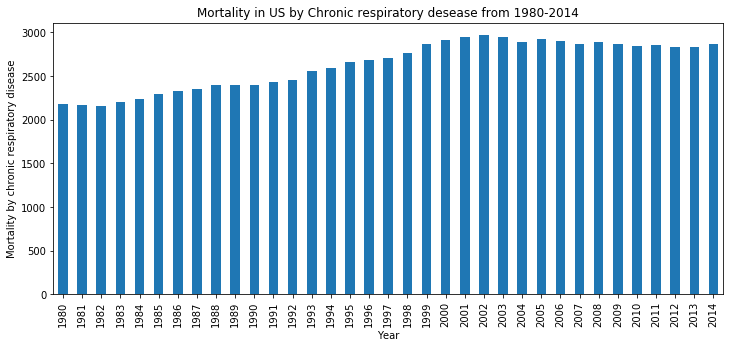

In [6]:
plt.rcParams['figure.figsize'] = (12.0, 5.0)
df5_respiratory=df4_respiratory.sum(0)
plt_res=df5_respiratory.plot.bar(title="Mortality in US by Chronic respiratory desease from 1980-2014")
plt_res.set_xlabel("Year")
plt_res.set_ylabel("Mortality by chronic respiratory disease")


([<matplotlib.axis.YTick at 0x1a1990d76a0>,
 <a list of 5 Text yticklabel objects>)

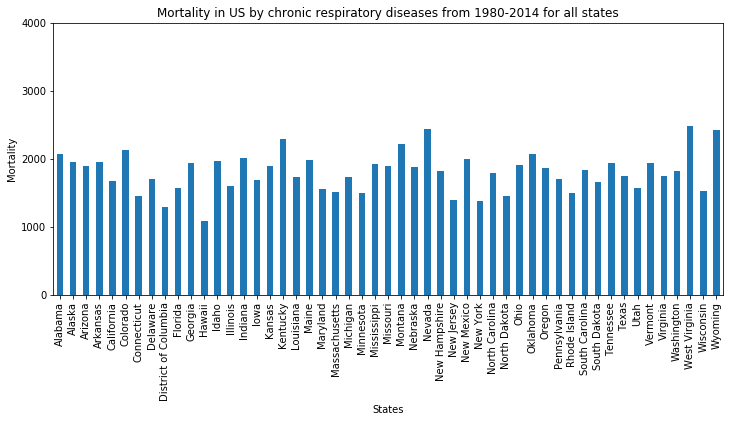

In [7]:
plt.rcParams['figure.figsize'] = (12.0, 5.0)
df6_respiratory=df4_respiratory.sum(1)
plt_res1=df6_respiratory.plot.bar(title="Mortality in US by chronic respiratory diseases from 1980-2014 for all states")
plt_res1.set_xlabel("States")
plt_res1.set_ylabel("Mortality")
plt.yticks(np.arange(0,5000, step=1000))

# CO2 emission by fossil fuels

In [8]:
# Import the data file and data preparation
df_en=pd.read_excel("C:\\Users\\poonam\\Desktop\\FIU\\2019 Fall\\Data Science\\Data sets for project\\Energy\\data from my research for project\\comenergy.xlsx")
df_en.columns=['year','coal','natural gas','petroleum']
df_en1=df_en.set_index('year')
df_en2=df_en1.loc[:,['coal','natural gas','petroleum']].sum(axis=1)
#df_en1=df_en['coal']+df_en['natural gas']+df_en['petroleum']
df_en3=df_en2[df_en2.index<2015]
#df_en3

Text(0, 0.5, 'CO2 Emission')

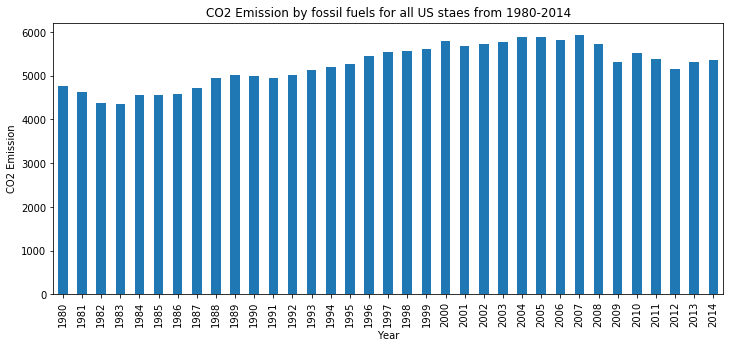

In [9]:
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt_en=df_en3.plot.bar(title="CO2 Emission by fossil fuels for all US staes from 1980-2014")
plt_en.set_xlabel("Year")
plt_en.set_ylabel("CO2 Emission")

# Scatter diagram of Chronic Respiratory diseases and CO2 emission

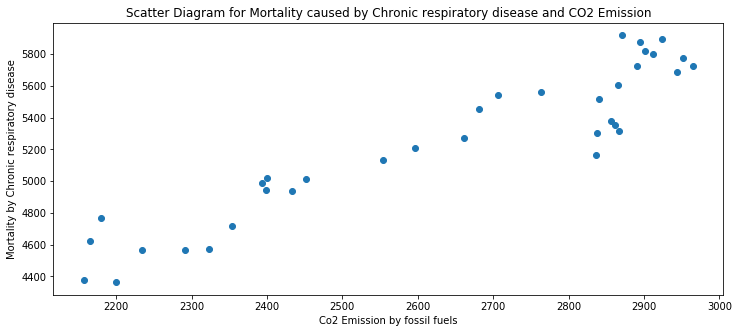

In [10]:

#plt.figsize =(20,10)
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.scatter(df5_respiratory,df_en3)
plt.title("Scatter Diagram for Mortality caused by Chronic respiratory disease and CO2 Emission")
plt.xlabel('Co2 Emission by fossil fuels')
plt.ylabel('Mortality by Chronic respiratory disease')
plt.show()

# Linear Regression Model 
# CO2 Emission vs Mortality by Chronic respiratory disease

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
x=df_en3.values.reshape(-1,1)
#print(x)
y=df5_respiratory.values.reshape(-1,1)
#print(y)

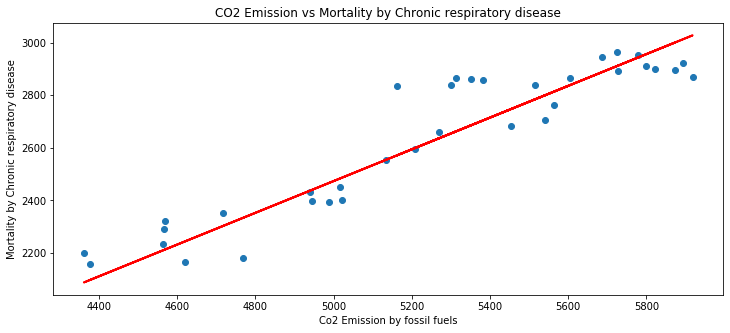

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
reg=LinearRegression()

reg.fit(x_train, y_train)
y_pred=reg.predict(x_test)

plt.scatter(x,y)
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.plot(x_test,y_pred,color='red',linewidth=2)

plt.title("CO2 Emission vs Mortality by Chronic respiratory disease")
plt.xlabel('Co2 Emission by fossil fuels')
plt.ylabel('Mortality by Chronic respiratory disease')
plt.show()

In [14]:
# Cofficient of determination or r2
r2_score=reg.score(x,y)
print(r2_score)

0.8633978680444665


In [15]:
from scipy import stats
stats.pearsonr(x, y)

(array([0.93439794]), array([2.36711831e-16]))

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 98.07605464509756
Mean Squared Error: 15331.69444181187
Root Mean Squared Error: 123.82121967502933


In [17]:
df_en3.describe()

count      35.000000
mean     5242.031429
std       469.675050
min      4361.700000
25%      4943.000000
50%      5301.200000
75%      5645.700000
max      5918.100000
dtype: float64

# Other Respiratory diseases Analysis 

In [18]:
df_otherrespiratory=df3[df3['cause_id'].isin(['520'])]
df1_otherrespiratory=df_otherrespiratory[['location_name','year_id','mx']]
df2_otherrespiratory=df1_otherrespiratory.set_index('location_name')
df3_otherrespiratory=df2_otherrespiratory.sort_values(by=['year_id'])
df4_otherrespiratory=df3_otherrespiratory.pivot(columns='year_id',values='mx')
df4_otherrespiratory[:5]

year_id,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
location_name,,,,,,,,,,,,,,,,,,,,,
Alabama,0.710215,0.703045,0.692876,0.699499,0.714011,0.719674,0.722736,0.711658,0.719670,0.716452,...,1.071513,1.104594,1.114663,1.125610,1.132845,1.131102,1.137031,1.144858,1.142731,1.131517
Alaska,0.546767,0.538320,0.534016,0.535561,0.542412,0.551047,0.558745,0.555007,0.560601,0.563311,...,0.862059,0.886048,0.905562,0.910350,0.917136,0.927196,0.936847,0.943064,0.953363,0.956504
Arizona,0.432256,0.425580,0.421296,0.419375,0.427612,0.427522,0.424637,0.424590,0.424496,0.420548,...,0.611235,0.625397,0.627235,0.630647,0.636175,0.632158,0.653476,0.646645,0.643931,0.647167
Arkansas,0.684168,0.673260,0.661305,0.662210,0.663130,0.666350,0.659767,0.650426,0.647204,0.640504,...,0.867955,0.884944,0.888789,0.900683,0.897527,0.885387,0.885670,0.886373,0.880161,0.871405
California,0.379492,0.373469,0.366498,0.362577,0.370442,0.375873,0.370033,0.365801,0.367304,0.362989,...,0.483490,0.495622,0.495910,0.496469,0.495012,0.489956,0.491548,0.490568,0.487933,0.474059


Text(0, 0.5, 'Mortality by other respiratory disease')

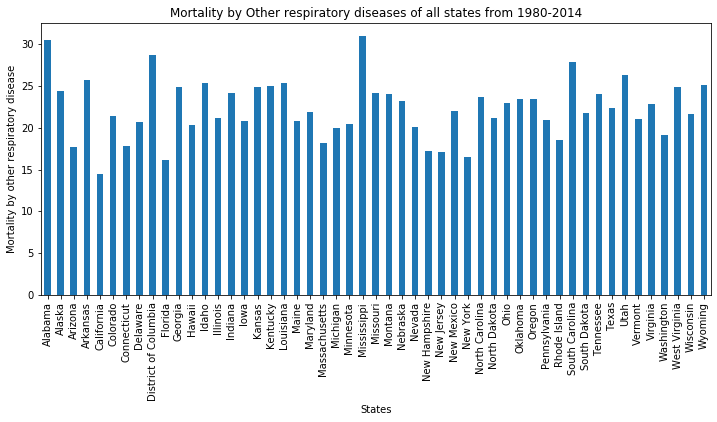

In [19]:
plt.rcParams['figure.figsize'] = (12.0, 5.0)
df5_otherrespiratory=df4_otherrespiratory.sum(1)
plt_ord=df5_otherrespiratory.plot.bar()
plt.title("Mortality by Other respiratory diseases of all states from 1980-2014")
plt.xlabel('States')
plt.ylabel('Mortality by other respiratory disease')


In [20]:
df6_otherrespiratory=df4_otherrespiratory.sum(0)
df6_otherrespiratory[:2]

year_id
1980    27.539330
1981    27.230725
dtype: float64

Text(0, 0.5, 'Mortality by other respiratory disease')

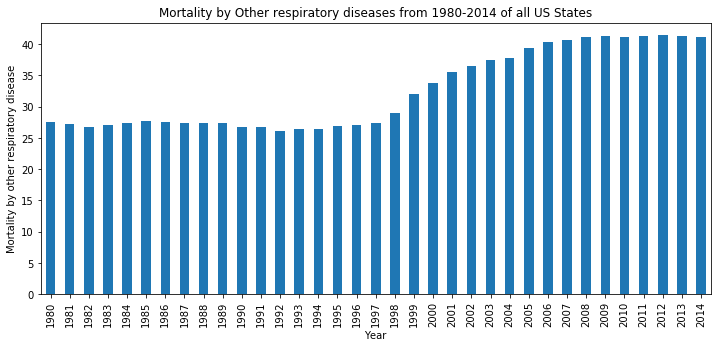

In [21]:
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt_ord1=df6_otherrespiratory.plot.bar()
plt.title("Mortality by Other respiratory diseases from 1980-2014 of all US States")
plt.xlabel('Year')
plt.ylabel('Mortality by other respiratory disease')

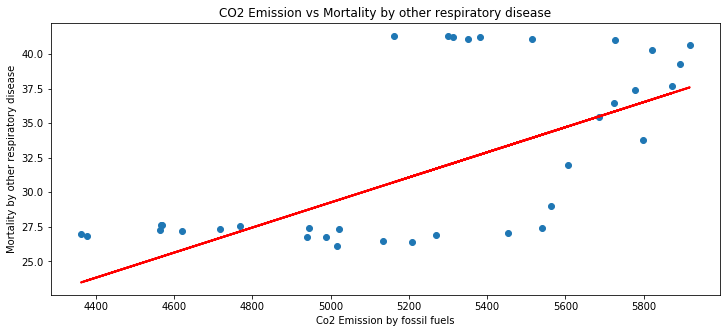

In [22]:
z=df6_otherrespiratory.values.reshape(-1,1)
#print(z)
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.4, random_state=1)
reg =LinearRegression()

reg.fit(x_train, z_train)
z_pred=reg.predict(x_test)
plt.scatter(x,z)
plt.plot(x_test,z_pred,color='red',linewidth=2)
plt.title("CO2 Emission vs Mortality by other respiratory disease")
plt.xlabel('Co2 Emission by fossil fuels')
plt.ylabel('Mortality by other respiratory disease')
plt.show()

In [23]:
r2_score=reg.score(x,z)
print(r2_score)

0.403166909413843


In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(z_test, z_pred))
print('Mean Squared Error:', metrics.mean_squared_error(z_test, z_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(z_test, z_pred)))

Mean Absolute Error: 4.647026554774077
Mean Squared Error: 31.063755551552923
Root Mean Squared Error: 5.573486839632164


# Asthma Analysis

In [25]:
df_asthma=df3[df3['cause_id'].isin(['515'])]
df1_asthma=df_asthma[['location_name','year_id','mx']]
df2_asthma=df1_asthma.set_index('location_name')
df3_asthma=df2_asthma.sort_values(by=['year_id'])
df4_asthma=df3_asthma.pivot(columns='year_id',values='mx')
df4_asthma[:5]

year_id,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
location_name,,,,,,,,,,,,,,,,,,,,,
Alabama,1.914180,1.880878,1.841024,1.838117,1.854592,1.872756,1.902550,1.927982,1.984099,1.995837,...,1.560401,1.524975,1.463714,1.429480,1.394069,1.355323,1.341311,1.343497,1.336854,1.334713
Alaska,2.427770,2.351951,2.319381,2.307433,2.311811,2.348733,2.387856,2.424691,2.477347,2.514376,...,1.855544,1.791763,1.719741,1.629827,1.596793,1.567724,1.554478,1.566239,1.571771,1.572168
Arizona,3.438598,3.317157,3.084659,3.047860,3.058677,2.970132,2.922652,2.914837,2.940378,2.878803,...,1.509344,1.428816,1.312566,1.239148,1.205624,1.154609,1.182014,1.125764,1.111960,1.092261
Arkansas,2.072041,2.029094,1.987026,1.998101,1.989988,2.018710,2.038766,2.078338,2.123785,2.154804,...,1.709062,1.657767,1.596926,1.572428,1.534577,1.479097,1.476818,1.477442,1.471897,1.474976
California,2.582500,2.511054,2.432614,2.413347,2.394839,2.408303,2.382298,2.423379,2.473736,2.442168,...,1.501265,1.456326,1.362786,1.310778,1.271265,1.215142,1.215522,1.174888,1.157847,1.127050


Text(0, 0.5, 'Mortality by Asthma')

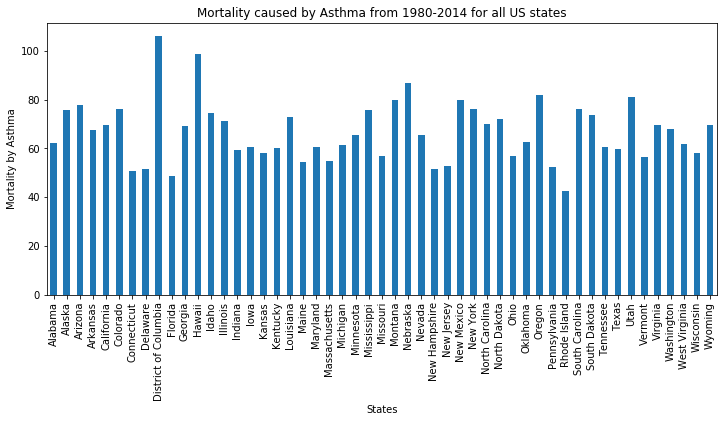

In [26]:
plt.rcParams['figure.figsize'] = (12.0, 5.0)
df5_asthma=df4_asthma.sum(1)
df5_asthma.plot.bar()
plt.title("Mortality caused by Asthma from 1980-2014 for all US states")
plt.xlabel('States')
plt.ylabel('Mortality by Asthma')

Text(0, 0.5, 'Mortality by Asthma')

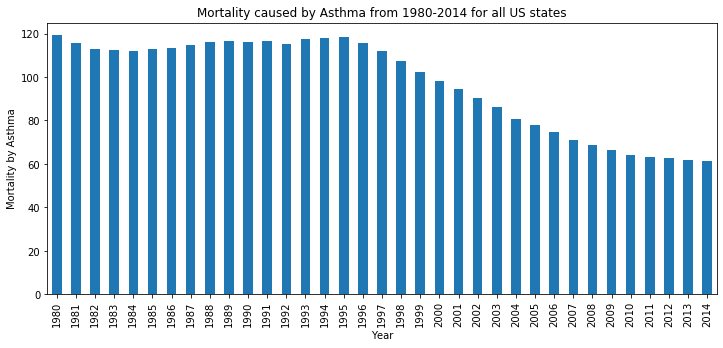

In [27]:
plt.rcParams['figure.figsize'] = (12.0, 5.0)
df6_asthma=df4_asthma.sum(0)
df6_asthma.plot.bar()
plt.title("Mortality caused by Asthma from 1980-2014 for all US states")
plt.xlabel('Year')
plt.ylabel('Mortality by Asthma')

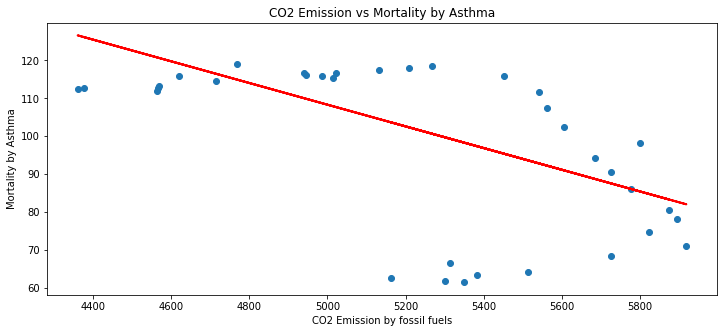

In [28]:
plt.rcParams['figure.figsize'] = (12.0, 5.0)
x=df_en3.values.reshape(-1,1)
#print(x)
k=df6_asthma.values.reshape(-1,1)
#print(k)
x_train, x_test, k_train, k_test = train_test_split(x, k, test_size=0.4, random_state=1)
reg =LinearRegression()

reg.fit(x_train, k_train)
k_pred=reg.predict(x_test)
plt.scatter(x,k)
plt.plot(x_test,k_pred,color='red',linewidth=2)
plt.title("CO2 Emission vs Mortality by Asthma")
plt.xlabel('CO2 Emission by fossil fuels')
plt.ylabel('Mortality by Asthma')
plt.show()

In [29]:
r2_score=reg.score(x,k)
print(r2_score)

0.29639268243359784


In [31]:
from scipy import stats
stats.pearsonr(x, k)

(array([-0.57845317]), array([0.00027283]))

In [30]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(k_test, k_pred))
print('Mean Squared Error:', metrics.mean_squared_error(k_test, k_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(k_test, k_pred)))

Mean Absolute Error: 17.107469761713162
Mean Squared Error: 427.12321885670457
Root Mean Squared Error: 20.66695959391958
